In this file we will create the 2x2 file

## Coding of the 2x2 matrix

In [74]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import pchip_interpolate

from genetic_algorithm_pfm.genetic_algorithm_pfm.algorithm import GeneticAlgorithm

In [75]:
# # # x1 1000 to 60000
# # # x2 ranges from 0 to 50000m

x1 = 5 #x1 is in m
x2 = 5 #x2 is in m

c1 = 25   # Costs per material m3
c2 = 4   # Cost of fuel use per L
c3 = 0.1   # Emission of materials per m3
c4 = 1.2   # Emission of fuel per L

k1 = 1.7   # Height of island
k2 = 1.9   # Ship size
k3 = 0.0009   # fuel use per m

F1 = x1 * k1 # Material in m3
F2 = k3 * ((F1 / k2) *x2) # Fuel in L

O1 = (F1 * c1 + F2 * c2) / 1E6 #total cost
O2 = (F1 * c3 + F2 * c4) / 1E6 #total emissions

print(f'Total cost: {O1:.2e} Million EUR')
print(f"Total emissions: {O2:.2e} million kg CO2")

Total cost: 2.13e-04 Million EUR
Total emissions: 8.74e-07 million kg CO2


In [76]:
w1 = .50 #ELIA
w2 = .50 #EIB

def objective_p1(x1, x2, x3):
    """
    Objective to maximize the profit.
    x1: size of the island (in m2)
    x2: distance to the mainland (in m)
    """

    c1 = 25   # Costs per material m3
    c2 = 4   # Cost of fuel use per L
    c3 = 0.1   # Emission of materials per m3
    c4 = 1.2   # Emission of fuel per L
    c5 = 150 # Capacity per m2 in kW / m2
    c6 = 1/10 # Scaling factor feasible distance
    c7 = 1 #geen idee
    c8 = 1 #geen idee
    c9 = 1 #geen idee
    c10 = 1 #geen idee

    k1 = 1.7   # Height of island
    k2 = 1.9   # Ship size
    k3 = 0.0009   # fuel use per m

    F1 = x1 * k1 # Material in m3
    F2 = k3 * ((F1 / k2) *x2) # Fuel in L

    O1 = F1 * c1 + F2 * c2 + x3/ 1E6
    return pchip_interpolate([1, 10, 50], [100, 20, 0], O1)

def objective_p2(x1, x2):
    """
    Objective to minimize the emissions.
    x1: size of the island (in m2)
    x2: distance to the mainland (in m)
    """
    c1 = 25   # Costs per material m3
    c2 = 4   # Cost of fuel use per L
    c3 = 0.1   # Emission of materials per m3
    c4 = 1.2   # Emission of fuel per L
    c5 = 150 # Capacity per m2 in kW / m2
    c6 = 1/10 # Scaling factor feasible distance
    c7 = 1 #geen idee
    c8 = 1 #geen idee
    c9 = 1 #geen idee
    c10 = 1 #geen idee

    k1 = 1.7   # Height of island
    k2 = 1.9   # Ship size
    k3 = 0.0009   # fuel use per m
    
    F1 = x1 * k1 # Material in m3
    F2 = k3 * ((F1 / k2) *x2) # Fuel in L

    O2 = F1 * c3 + F2 * c4 / 1E6

    return pchip_interpolate([0.5, 4, 10], [100, 80, 0], O2)

def objective_p3(x1, x2):
    """
    Objective to minimize the emissions.
    x1: size of the island (in m2)
    x2: distance to the mainland (in m)
    """
    c1 = 25   # Costs per material m3
    c2 = 4   # Cost of fuel use per L
    c3 = 0.1   # Emission of materials per m3
    c4 = 1.2   # Emission of fuel per L
    c5 = 150 # Capacity per m2 in kW / m2
    c6 = 1/10 # Scaling factor feasible distance
    c7 = 1 #geen idee
    c8 = 1 #geen idee
    c9 = 1 #geen idee
    c10 = 1 #geen idee

    k1 = 1.7   # Height of island
    k2 = 1.9   # Ship size
    k3 = 0.0009   # fuel use per m
    
    F1 = x1 * k1 # Material in m3
    F2 = k3 * ((F1 / k2) *x2) # Fuel in L

    O3 = x1 * c5 * (np.exp(-c6 * x2) + 1)

    return pchip_interpolate([0, 1, 5 , 8.5], [0, 0, 100 ,100], O3)

def objective(variables):
    """
    Objective function that is fed to the GA. Calles the separate preference functions that are declared above.

    :param variables: array with design variable values per member of the population. Can be split by using array
    slicing
    :return: 1D-array with aggregated preference scores for the members of the population.
    """
    # extract 1D design variable arrays from full 'variables' array
    x1 = variables[:, 0]
    x2 = variables[:, 1]
    x3 = variables[:, 2]

    # calculate the preference scores
    p_1 = objective_p1(x1, x2, x3)
    p_2 = objective_p2(x1, x2)
    p_3 = objective_p3(x1, x2)

    # aggregate preference scores and return this to the GA
    return [0.34, 0.33, 0.33], [p_1, p_2, p_3]

In [77]:
#fuctions for constraints
cons = []

b1 = [5, 99]  # x1 bounds
b2 = [5, 70]  # x2 bounds
b3 = [0, 1]  # x2 bounds
bounds = [b1, b2, b3]

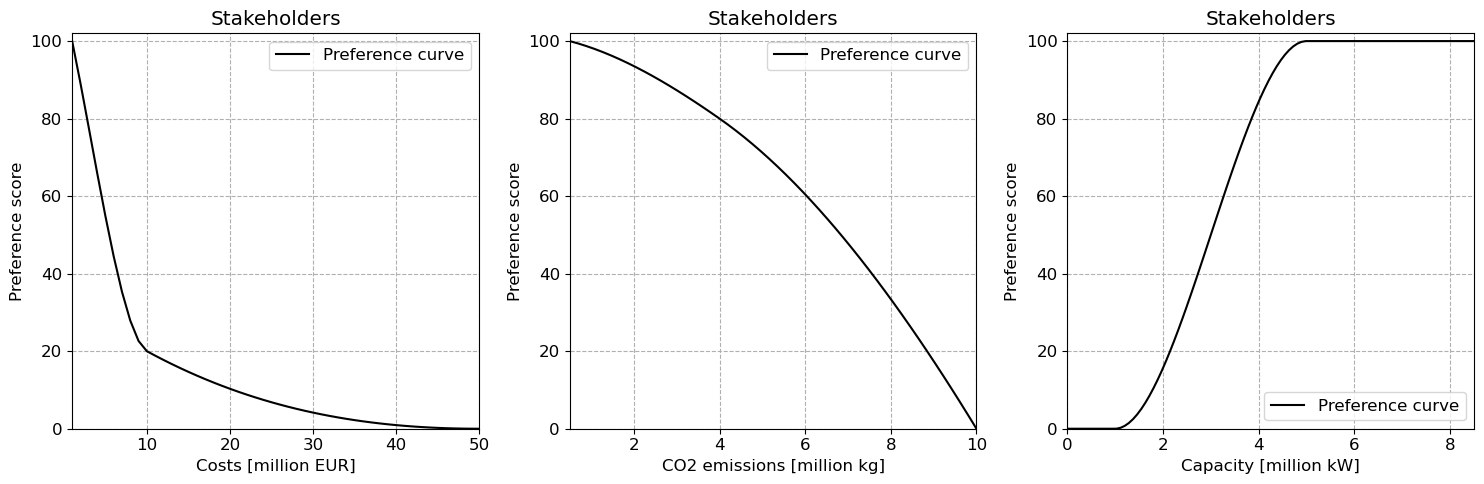

In [78]:
# create arrays for plotting continuous preference curves
c1 = np.linspace(1, 50) #different values of x1
c2 = np.linspace(0.5, 10) #different values of x2
c3 = np.linspace(0, 8.5, 100) #different values of x3

# calculate the preference functions
p1 = pchip_interpolate([1, 10, 50], [100, 20, 0], (c1))
p2 = pchip_interpolate([0.5, 4, 10], [100, 80, 0], (c2))
p3 = pchip_interpolate([0, 1, 5 , 8.5], [0, 0, 100 ,100], (c3))

# create figure that plots all preference curves and the preference scores of the returned results of the GA
fig = plt.figure(figsize=((15,5)))

font1 = {'size':20}
font2 = {'size':15}

plt.rcParams['font.size'] = '12'
plt.rcParams['savefig.dpi'] = 300

ax1 = fig.add_subplot(1, 3, 1)
ax1.plot(c1, p1, label='Preference curve', color='black')

ax1.set_xlim((1, 50))
ax1.set_ylim((0, 102))
ax1.set_title('Stakeholders')
ax1.set_xlabel('Costs [million EUR]')
ax1.set_ylabel('Preference score')
ax1.grid()
ax1.grid(linestyle = '--')

#fig = plt.figure()
ax2 = fig.add_subplot(1, 3, 2)
ax2.plot(c2, p2, label='Preference curve', color='black')
ax2.set_xlim((0.5, 10))
ax2.set_ylim((0, 102))
ax2.set_title('Stakeholders')
ax2.set_xlabel('CO2 emissions [million kg]')
ax2.set_ylabel('Preference score')
ax2.grid()
ax2.legend()
ax2.grid(linestyle = '--')

ax3 = fig.add_subplot(1, 3, 3)
ax3.plot(c3, p3, label='Preference curve', color='black')
ax3.set_xlim((0, 8.5))
ax3.set_ylim((0, 102))
ax3.set_title('Stakeholders')
ax3.set_xlabel('Capacity [million kW]')
ax3.set_ylabel('Preference score')
ax3.grid()
ax3.legend()
ax3.grid(linestyle = '--')

ax1.legend()
ax2.legend()
ax3.legend()
fig.tight_layout()

Run GA with minmax
The type of aggregation is set to minmax
Generation   Best score   Mean             Max stall    Diversity    Number of non-feasible results
0            111.5156     612673.0218      0            0.005        0           
1            111.1837     289642.8649      0            0.168        0           
2            111.1837     198129.2983      0            0.277        0           
3            111.1759     142538.6752      0            0.29         0           
4            111.1759     68716.3645       0            0.578        0           
5            111.1759     51336.7441       1            0.605        0           
6            111.1759     34636.2731       2            0.61         0           
7            111.1759     30561.7185       3            0.617        0           
8            111.1759     22153.3419       4            0.612        0           
9            111.1759     26202.9494       5            0.615        0           
10           111.175

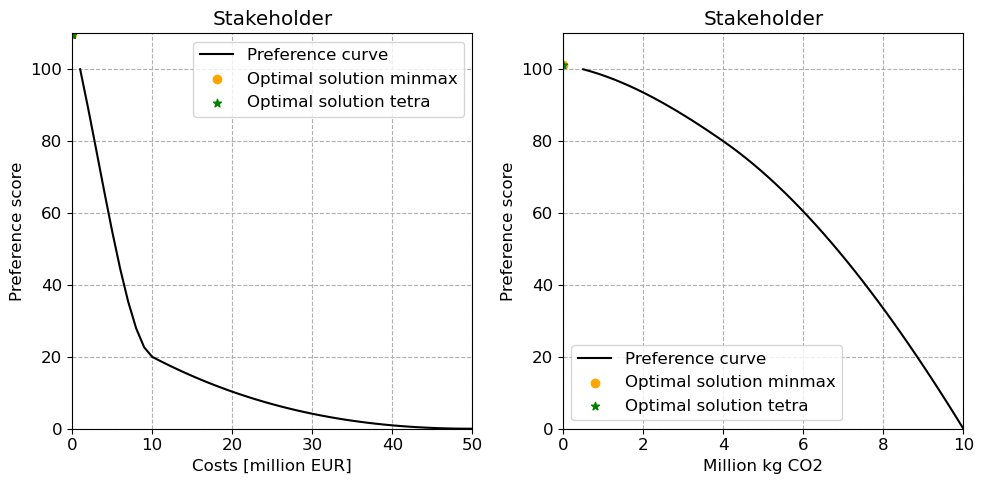

In [79]:
# We run the optimization with two paradigms
paradigm = ['minmax', 'tetra']
marker = ['o', '*']
colours = ['orange','green']

c1 = 25   # Costs per material m3
c2 = 4   # Cost of fuel use per L
c3 = 0.1   # Emission of materials per m3
c4 = 1.2   # Emission of fuel per L

k1 = 1.7   # Height of island
k2 = 1.9   # Ship size
k3 = 0.9   # fuel use per km

# The figure and axes are defined before the loop
fig = plt.figure(figsize=(10, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

for i in range(2):
    # make dictionary with parameter settings for the GA run with the IMAP solver
    options = {
        'n_bits': 8,
        'n_iter': 400,
        'n_pop': 500,
        'r_cross': 0.8,
        'max_stall': 8,
        'aggregation': paradigm[i], # minmax or tetra
        'var_type': 'real'
    }

    # run the GA and print its result
    print(f'Run GA with ' + paradigm[i])
    ga = GeneticAlgorithm(objective=objective, constraints=cons, bounds=bounds, options=options)
    score_IMAP, design_variables_IMAP, _ = ga.run()

    print(f'Optimal result for x1 = {round(design_variables_IMAP[0], 2)} size and x2 = {round(design_variables_IMAP[1], 2)} distance')

    #profit = round(11.25*design_variables_IMAP[0]+13.75*design_variables_IMAP[1]+15*design_variables_IMAP[2]+11.25*design_variables_IMAP[3])
    #print(f'Profit: {profit}')

    # Calculate individual preference scores for the GA results
    F1 = design_variables_IMAP[0] * k1 # Material in m3
    F2 = k3 * ((F1 / k2) *design_variables_IMAP[1]) # Fuel in L

    O1 = (F1 * c1 + F2 * c2)  / 1E6 #total cost
    O2 = (F1 * c3 + F2 * c4) / 1E6 #total emissions
    c1_res = O1
    p1_res = pchip_interpolate([1, 10, 50], [100, 20, 0], (c1_res))

    c2_res = O2
    p2_res = pchip_interpolate([0.5, 4, 10], [100, 80, 0], (c2_res))

    # Debugging prints to check the calculated values
    print(f"c1_res: {c1_res}, p1_res: {p1_res}")
    print(f"c2_res: {c2_res}, p2_res: {p2_res}")

    # Plot the preference curves
    if i == 0:  # Only plot curves once
        c1 = np.linspace(1, 50)
        c2 = np.linspace(0.5, 10)

        p1 = pchip_interpolate([1, 10, 50], [100, 20, 0], (c1))
        p2 = pchip_interpolate([0.5, 4, 10], [100, 80, 0], (c2))

        ax1.plot(c1, p1, label='Preference curve', color='black')
        ax1.set_xlim((0, 50))
        ax1.set_ylim((0, 110))
        ax1.set_title('Stakeholder')
        ax1.set_xlabel('Costs [million EUR]')
        ax1.set_ylabel('Preference score')
        ax1.grid(linestyle='--')

        ax2.plot(c2, p2, label='Preference curve', color='black')
        ax2.set_xlim((0, 10))
        ax2.set_ylim((0, 110))
        ax2.set_title('Stakeholder')
        ax2.set_xlabel('Million kg CO2')
        ax2.set_ylabel('Preference score')
        ax2.grid(linestyle='--')

    # Scatter the results on the preference curve plots
    ax1.scatter(c1_res, p1_res, label='Optimal solution ' + paradigm[i], color= colours[i], marker=marker[i])
    ax2.scatter(c2_res, p2_res, label='Optimal solution ' + paradigm[i], color=colours[i], marker=marker[i])

# Add legends and adjust layout after plotting all data points
ax1.legend()
ax2.legend()
fig.tight_layout()

# Display the plot
plt.show()